# Figures and Tables IV

This file is part of the replication code for: 

Offshore Profit Shifting and Aggregate Measurement: Balance of Payments, Foreign Investment, Productivity, and the Labor Share by Guvenen, Mataloni Jr., Rassier, and Ruhl. 

This version: February 21, 2022

This file creates figure 4. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as geo
import matplotlib.image as mpimg
from PIL import Image

C:\Users\kimru\anaconda3\envs\geo3\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


## Plot the map

In [2]:
# These files are from the natural earth website
ne = geo.read_file('../1-raw-data/ne_110m_admin_0_countries_lakes')

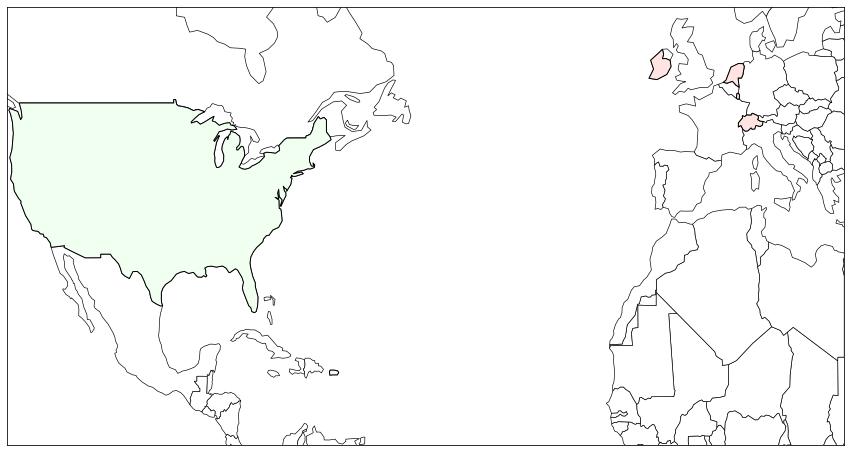

In [3]:
fig, ax = plt.subplots(figsize=(15,15))
ne[ne['LEVEL']==2].plot(ax=ax, color='white', edgecolor='black', linewidth=0.65)
ne[ne['SOV_A3']=='US1'].plot(ax=ax, color='honeydew', edgecolor='black')

reds = ['CHE', 'LUX', 'IRL', 'NL1']
ne[ne['SOV_A3'].isin(reds)].plot(ax=ax, color='mistyrose', edgecolor='black')

ax.set_ylim(10, 60)
ax.set_xlim(-125, 25)

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.savefig('../3-intermediate-files/map_raw.png', bbox_inches='tight', dpi=600)

Here we shrink the Atlantic Ocean. It's dead space in the figure. 

In [4]:
im = Image.open('../3-intermediate-files/map_raw.png')

width = im.size[0]
height = im.size[1]

print('width {} by height {}'.format(width, height))

width_l = int(0.517*width)
left_crop = im.crop((0, 0, width_l,height))
#left_crop.show()

width_r = width-int(width*0.335)
right_crop = im.crop((width_r, 0, width, height))

#right_crop.show()

new_im = Image.new('RGB', (width_l + (width-width_r), height))
new_im.paste(left_crop, (0,0))
new_im.paste(right_crop, (width_l,0))

#new_im.show()

new_im.save('../3-intermediate-files/map_trimmed.png', 'PNG')

width 7095 by height 3771


## Load the data to add to the map



In [5]:
#adj = 
adj = pd.read_excel('../0-confidential-data-replication-files/USDIA/OutputAdjNetCountry2016.xlsx',
                   index_col='CountryName')
cca = pd.read_csv('../3-intermediate-files/aggregate.csv', index_col=[0])

adj['adjustment_cca'] = (adj['adjwt3s'])*cca.loc[2016,'income_adj_factor']
adj.head(1)

,adjcomps,adjsales,adjrdstks,adjppes,adjwt3s,nips,adjustment_cca
CountryName,,,,,,,
Afghanistan,-0.001775,-0.001443,0.0,-0.001089,-0.001444,-0.004451,-0.001516


## Figure 4

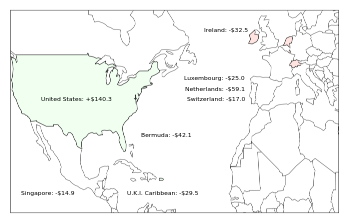

In [6]:
img=mpimg.imread('../3-intermediate-files/map_trimmed.png')
imgplot = plt.imshow(img)
ax = plt.gca()


ax.annotate('United States: +${:.1f}'.format(-1*adj['adjwt3s'].sum()*cca.loc[2016, 'income_adj_factor']), 
            xy=(0.10, 0.55), xycoords='axes fraction', fontsize=6)

ax.annotate('Ireland: -${:.1f}'.format(np.abs(adj.loc['Ireland', 'adjustment_cca'])), 
            xy=(0.72, 0.88), xycoords='axes fraction', fontsize=6, ha='right')

ax.annotate('Luxembourg: -${:.1f}'.format(np.abs(adj.loc['Luxembourg', 'adjustment_cca'])), 
            xy=(0.71, 0.65), xycoords='axes fraction', fontsize=6, ha='right')

ax.annotate('Netherlands: -${:.1f}'.format(np.abs(adj.loc['Netherlands', 'adjustment_cca'])), 
            xy=(0.71, 0.60), xycoords='axes fraction', fontsize=6, ha='right')

ax.annotate('Switzerland: -${:.1f}'.format(np.abs(adj.loc['Switzerland', 'adjustment_cca'])), 
            xy=(0.71, 0.55), xycoords='axes fraction', fontsize=6, ha='right')

ax.annotate('Bermuda: -${:.1f}'.format(np.abs(adj.loc['Bermuda', 'adjustment_cca'])), 
            xy=(0.55, 0.38), xycoords='axes fraction', fontsize=6, ha='right')

ax.annotate('U.K.I. Caribbean: -${:.1f}'.format(np.abs(adj.loc['UK Islands - Caribbean', 'adjustment_cca'])), 
            xy=(0.57, 0.1), xycoords='axes fraction', fontsize=6, ha='right')

ax.annotate('Singapore: -${:.1f}'.format(np.abs(adj.loc['Singapore', 'adjustment_cca'])), 
            xy=(0.2, 0.1), xycoords='axes fraction', fontsize=6, ha='right')

plt.axis('off')
plt.savefig('../4-figures/map.pdf', bbox_inches='tight', dpi=600)